In [136]:
import pandas as pd
import numpy as np
import re

from HTMLParser import HTMLParser
from scipy.spatial.distance import cdist
from pprint import pprint
from textblob import TextBlob

from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from gensim import models, corpora, similarities
from gensim.models import tfidfmodel, TfidfModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib

In [135]:
font = {'family' : 'monospace',
        'weight' : 'medium',
        'size'   : 24}

matplotlib.rc('font', **font)

In [71]:
def total_tickets_sold(x):
    """
    Input: dataframe x with column 'quantity sold'
    ------------
    Returns: Total Number of Tickets sold
    """
    sold = []
    for i in x:
        sold.append(i['quantity_sold'])
    return sum(sold)

def median_ticket_cost(x):
    """
    Input: dataframe x with column called 'cost'
    ----------------
    Returns: median cost
    """
    costs = []

    for i in x:

        costs.append(i['cost'])

    return np.median(costs) 

In [47]:
def namestr(**kwargs):
    for k,v in kwargs.items():
        print "%s" %k

In [2]:
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleanr2 = re.compile('\r')
    cleanr3 = re.compile('\n')
    cleanr4 = re.compile('\t')
    cleanr5 = re.compile('\xa0')
    cleanr6 = re.compile('\u')
    
    raw_html = re.sub(cleanr, '', raw_html)
    raw_html = re.sub(cleanr2, '', raw_html)
    raw_html = re.sub(cleanr3, '', raw_html)
    raw_html = re.sub(cleanr4, '', raw_html)
    raw_html = re.sub(cleanr5, '', raw_html)
    raw_html = re.sub(cleanr6, '', raw_html)
    return raw_html

In [3]:
df = pd.read_json('data.json')

In [5]:
train_df = df[(df['acct_type']=='fraudster_event') | (df['acct_type']=='premium') | (df['acct_type']=='fraudster')]

(14337, 46)

In [6]:
labels = []
for event in train_df['acct_type']:
    if event == 'premium':
        labels.append(0)
    else:
        labels.append(1)

In [7]:
train_df['labels'] = labels

/home/rafa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


# NLP

<h1> Will NLP work??? </h1>
.  

.  

.  
  
.  

.  

.  

.  

.  

  
    
     
<h1> SPOILER ALERT! </h1>








It didn't!

In [10]:
fraud_text = np.array(train_df[train_df['labels'] == 1]['description'])
true_text  = np.array(train_df[train_df['labels'] == 0]['description'])

In [11]:
fraud_text = [cleanhtml(text) for text in fraud_text]
true_text  = [cleanhtml(text) for text in true_text]

In [12]:
fraud_text = np.array(fraud_text)
true_text  = np.array(true_text)

In [13]:
tfidf = TfidfVectorizer(stop_words='english')

In [14]:
fraud_fit = tfidf.fit(fraud_text)
fraud_vecs = tfidf.transform(fraud_text)

In [15]:
tfidf = TfidfVectorizer(stop_words='english')
true_fit = tfidf.fit(true_text)
true_vecs = tfidf.transform(true_text)

In [18]:
index = np.random.randint(0, len(fraud_text), size = 10)
samp_fraud = fraud_vecs[index]
index = np.random.randint(0, len(true_text), size = 10)
samp_true  = true_vecs[index]

In [29]:
cos_fraud = cosine_similarity(samp_fraud, fraud_vecs)
cos_true = cosine_similarity(samp_true, true_vecs)

In [42]:
svd = TruncatedSVD(n_components=10)

In [51]:
fvecs = svd.fit_transform(fraud_vecs)
tvecs = svd.fit_transform(true_vecs)
sfvecs = svd.fit_transform(samp_fraud)
stvecs = svd.fit_transform(samp_true)

In [68]:
for samp in [sfvecs, stvecs]:
    print np.linalg.norm(samp)

2.64575131106
3.0


In [81]:
train_df['total_tickets_sold'] = map(lambda X: total_tickets_sold(X), train_df['ticket_types'])
train_df['median_ticket_cost'] = map(lambda X: median_ticket_cost(X), train_df['ticket_types'])

/home/rafa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/rafa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [82]:
train_df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,labels,total_tickets_sold,median_ticket_cost
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,1,0,50.00
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,0,25,35.00
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,0,48,93.51
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,3,,None,NaN,NaN,None,None,0,58,13.50
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,0,39,92.50


In [99]:
fticks = train_df[(train_df['labels'] == 0) & (train_df['total_tickets_sold'] < 300)]['total_tickets_sold']
tticks = train_df[(train_df['labels'] == 1) & (train_df['total_tickets_sold']<300)]['total_tickets_sold']

In [121]:
def plt_hist(lst, bins = 10, title = None, grid = True, figsize = (10, 10), \
             xlabel = None, ylabel = 'percentage', extra_colors = [], labels = []):
    
    """Takes a list of arrays and 
    plots their histograms on the same graph
    
    Inputs:
        lst:          list of arrays, each array will have a histogram
        title:        main title of the plot, default 'None'
        grid:         grid appears if True, no grid if False, default True
        figsize:      size of the plot, default = (10, 10)
        xlabel:       label of x-axis, default = 'None'
        ylabel:       label of y-axis, default = 'percentage'
        extra_colors: list of other colors to add to the color_list, default = []
        labels:       list of labels for each histogram, default = []
        
    -------------------
        Returns: a histogram of each array in the list
    """
    
    
    color_list = ['#FF8C00', '#FAFCCC', '#EA653B', '#EE993D', \
                  '#EA653B','#ED9239', '#A4A7AA', '#676767']
    
    if extra_colors != []: 
        for c in extra_colors:
            color_list.append(c)
    
    
    if len(lst) > len(color_list):
        print 'Not enough colors for each histogram'
        print 'we will automatically assign them to black'
        print 'Assign {} more colors to fix this problem'.format(len(lst) - len(color_list))
        
    
    fig = plt.figure(figsize=figsize)
    
    # Adds a grid backgroud if 'grid = True'
    if grid:
        plt.grid(zorder = 0, linestyle = 'dashed', color = '#acaaa8')
    
    
    for index, array in enumerate(lst):
        plt.hist(array,
                 bins = bins,
                 ec = 'k', 
                 color=color_list[index], 
                 zorder = 3, 
                 alpha = 0.5, 
                 normed=1, 
                 label = 'Array {}'.format(index))
        plt.legend()
        if title:
            plt.title(title)
        if xlabel:
            plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    plt.show()

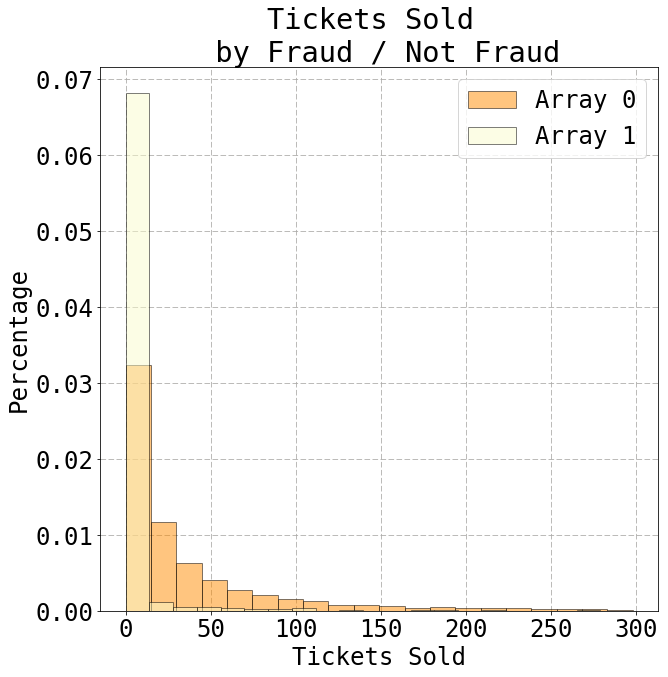

In [122]:
plt_hist([fticks, tticks], 
         xlabel = 'Tickets Sold', 
         ylabel = 'Percentage', 
         title = 'Tickets Sold \n by Fraud / Not Fraud', 
         bins = 20)

In [128]:
cleaned_df = pd.read_csv('Clean_df.csv')

In [130]:
cleaned_df.head()

,Unnamed: 0,channels,delivery_method,show_map,user_type,has_logo,org_facebook,sale_duration,sale_duration2,num_ticket_type,median_ticket_cost,total_tickets_sold,nan_delivery_method,nan_org_facebook,nan_num_ticket_type,nan_median_ticket_cost,payout_type_CHECK,payout_type_MISSING
0,0,5,0.0,1,1,0,0.0,29.0,33,3.0,50.00,0,False,False,False,False,0,1
1,1,0,1.0,0,3,1,0.0,28.0,28,2.0,35.00,25,False,False,False,False,1,0
2,2,8,1.0,0,3,0,0.0,54.0,54,1.0,93.51,48,False,False,False,False,1,0
3,3,6,1.0,0,3,1,0.0,0.0,0,6.0,13.50,58,False,False,False,False,0,0
4,4,11,0.0,0,3,0,0.0,63.0,63,8.0,92.50,39,False,False,False,False,1,0


In [ ]:
model = 